Trey Tuscai and Gordon Doore

### Extension 1: 

ResNet34: We make a ResNet with the given structure: 

```
block_units = [64, 128, 256, 512]
num_blocks = [3, 4, 6, 3]
first_block_strides = [1, 2, 2, 2]
```
This is just a new class in resnet.py


In [2]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [3]:
from datasets import get_dataset

x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10')
x_dev = x_train[:500]
y_dev = y_train[:500]

2025-04-10 20:14:22.687141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20601 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


In [4]:
from resnets import ResNet34
tf.keras.backend.clear_session()
tf.random.set_seed(0)

model = ResNet34(10, (32,32,3), reg = 1.5)
model.compile(optimizer='adamw')
train_loss_hist, val_loss_hist, val_acc_hist, e  = model.fit(x_dev, y_dev, x_dev, y_dev, val_every = 1, verbose = True, patience=15, lr_patience=4)

2025-04-10 20:14:26.271130: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90400


---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
Global Avg Pooling 2D layer output(GlobalAveragePool2D) shape: [1, 512]
stack_4/block_3:
	Conv2D layer output(stack_4/block_3/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_3/main_3x3conv_1) shape: [1, 4, 4, 512]
stack_4/block_2:
	Conv2D layer output(stack_4/block_2/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_2/main_3x3conv_1) shape: [1, 4, 4, 512]
stack_4/block_1:
	Conv2D layer output(stack_4/block_1/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_1/main_3x3conv_1) shape: [1, 4, 4, 512]
	-->Conv2D1x1 layer output(stack_4/block_1/skip_conv1x1) shape: [1, 4, 4, 512]-->
stack_3/block_6:
	Conv2D layer output(stack_3/block_6/main_3x3conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(stack_3/block_6/main_3x3conv_1) shape: [1, 8, 8, 256]
stack_3/block_5:
	Conv2D layer output(stack_3/block_5/main_3

I0000 00:00:1744316098.018332    1562 service.cc:145] XLA service 0x7c1b85e2b2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744316098.018373    1562 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-04-10 20:14:58.026101: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744316098.105472    1562 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1: Training Loss = 3.0581, Validation Loss = 33.7987, Validation Accuracy = 0.0826
Epoch 1/10000 took 41.6933 seconds


Epoch 2: Training Loss = 2.2457, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 2/10000 took 0.8515 seconds


Epoch 3: Training Loss = 1.6052, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 3/10000 took 0.7792 seconds


Epoch 4: Training Loss = 1.4381, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 4/10000 took 0.7793 seconds


Epoch 5: Training Loss = 1.3210, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 5/10000 took 0.7809 seconds


Epoch 6: Training Loss = 0.9776, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 6/10000 took 0.7798 seconds


Epoch 7: Training Loss = 0.7386, Validation Loss = 32.0717, Validation Accuracy = 0.1295
Epoch 7/10000 took 0.7805 seconds


Epoch 8: Training Loss = 0.6692, Validation Loss = 33.2230, Validation Accuracy = 0.0982
Epoch 8/10000 took 0.7800 seconds


Epoch 9: Training Loss = 0.4263, Validation Loss = 33.7987, Validation Accuracy = 0.0826
Epoch 9/10000 took 0.7818 seconds


Current lr= 0.001 Updated lr= 0.0005
Epoch 10: Training Loss = 0.3046, Validation Loss = 33.7184, Validation Accuracy = 0.0826
Epoch 10/10000 took 0.7876 seconds


Epoch 11: Training Loss = 0.3726, Validation Loss = 32.9380, Validation Accuracy = 0.0826
Epoch 11/10000 took 0.7749 seconds


Epoch 12: Training Loss = 0.2096, Validation Loss = 31.9590, Validation Accuracy = 0.0871
Epoch 12/10000 took 0.7809 seconds


Epoch 13: Training Loss = 0.1581, Validation Loss = 25.8790, Validation Accuracy = 0.1406
Epoch 13/10000 took 0.7781 seconds


Epoch 14: Training Loss = 0.1076, Validation Loss = 14.6913, Validation Accuracy = 0.1830
Epoch 14/10000 took 0.7785 seconds


Epoch 15: Training Loss = 0.0568, Validation Loss = 10.7072, Validation Accuracy = 0.2299
Epoch 15/10000 took 0.7794 seconds


Epoch 16: Training Loss = 0.0710, Validation Loss = 6.3548, Validation Accuracy = 0.3103
Epoch 16/10000 took 0.7844 seconds


Epoch 17: Training Loss = 0.0449, Validation Loss = 5.8967, Validation Accuracy = 0.3326
Epoch 17/10000 took 0.7818 seconds


Epoch 18: Training Loss = 0.0322, Validation Loss = 7.0233, Validation Accuracy = 0.2344
Epoch 18/10000 took 0.7853 seconds


Epoch 19: Training Loss = 0.0284, Validation Loss = 2.4087, Validation Accuracy = 0.5112
Epoch 19/10000 took 0.7852 seconds


Epoch 20: Training Loss = 0.0135, Validation Loss = 0.9598, Validation Accuracy = 0.7299
Epoch 20/10000 took 0.7864 seconds


Epoch 21: Training Loss = 0.0095, Validation Loss = 0.6568, Validation Accuracy = 0.8147
Epoch 21/10000 took 0.7884 seconds


Epoch 22: Training Loss = 0.0061, Validation Loss = 0.6443, Validation Accuracy = 0.7969
Epoch 22/10000 took 0.7879 seconds


Epoch 23: Training Loss = 0.0045, Validation Loss = 0.7060, Validation Accuracy = 0.7388
Epoch 23/10000 took 0.7874 seconds


Epoch 24: Training Loss = 0.0253, Validation Loss = 0.9958, Validation Accuracy = 0.6920
Epoch 24/10000 took 0.7864 seconds


Current lr= 0.0005 Updated lr= 0.00025
Epoch 25: Training Loss = 0.0157, Validation Loss = 1.4572, Validation Accuracy = 0.6205
Epoch 25/10000 took 0.7910 seconds


Epoch 26: Training Loss = 0.0188, Validation Loss = 1.4065, Validation Accuracy = 0.6429
Epoch 26/10000 took 0.7857 seconds


Epoch 27: Training Loss = 0.0585, Validation Loss = 1.2025, Validation Accuracy = 0.6607
Epoch 27/10000 took 0.7861 seconds


Epoch 28: Training Loss = 0.0268, Validation Loss = 1.1120, Validation Accuracy = 0.6741
Epoch 28/10000 took 0.7928 seconds


Epoch 29: Training Loss = 0.0172, Validation Loss = 1.1406, Validation Accuracy = 0.6607
Epoch 29/10000 took 0.7933 seconds


Epoch 30: Training Loss = 0.0089, Validation Loss = 1.1594, Validation Accuracy = 0.6518
Epoch 30/10000 took 0.7900 seconds


Current lr= 0.00025 Updated lr= 0.000125
Epoch 31: Training Loss = 0.0068, Validation Loss = 1.1582, Validation Accuracy = 0.6384
Epoch 31/10000 took 0.7917 seconds


Epoch 32: Training Loss = 0.0069, Validation Loss = 1.1414, Validation Accuracy = 0.6339
Epoch 32/10000 took 0.7899 seconds


Epoch 33: Training Loss = 0.0009, Validation Loss = 1.1460, Validation Accuracy = 0.6339
Epoch 33/10000 took 0.7860 seconds


Epoch 34: Training Loss = 0.0043, Validation Loss = 1.1373, Validation Accuracy = 0.6429
Epoch 34/10000 took 0.7882 seconds


Epoch 35: Training Loss = 0.0019, Validation Loss = 1.0824, Validation Accuracy = 0.6607
Epoch 35/10000 took 0.7884 seconds


Epoch 36: Training Loss = 0.0025, Validation Loss = 1.0089, Validation Accuracy = 0.6853
Early stopping triggered at epoch 36
Finished training after 36 epochs!


In [5]:
from resnets import ResNet34
tf.keras.backend.clear_session()
tf.random.set_seed(0)

model = ResNet34(10, (32,32,3), reg = 2)
model.compile(optimizer='adamw')
train_loss_hist2, val_loss_hist2, val_acc_hist2, e2  = model.fit(x_train, y_train, x_val, y_val, val_every = 1, verbose = True, patience=15, lr_patience=4)

---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
Global Avg Pooling 2D layer output(GlobalAveragePool2D) shape: [1, 512]
stack_4/block_3:
	Conv2D layer output(stack_4/block_3/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_3/main_3x3conv_1) shape: [1, 4, 4, 512]
stack_4/block_2:
	Conv2D layer output(stack_4/block_2/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_2/main_3x3conv_1) shape: [1, 4, 4, 512]
stack_4/block_1:
	Conv2D layer output(stack_4/block_1/main_3x3conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(stack_4/block_1/main_3x3conv_1) shape: [1, 4, 4, 512]
	-->Conv2D1x1 layer output(stack_4/block_1/skip_conv1x1) shape: [1, 4, 4, 512]-->
stack_3/block_6:
	Conv2D layer output(stack_3/block_6/main_3x3conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(stack_3/block_6/main_3x3conv_1) shape: [1, 8, 8, 256]
stack_3/block_5:
	Conv2D layer output(stack_3/block_5/main_3

Epoch 1: Training Loss = 1.4235, Validation Loss = 3.0765, Validation Accuracy = 0.1510
Epoch 1/10000 took 96.3478 seconds


Epoch 2: Training Loss = 0.9317, Validation Loss = 3.4473, Validation Accuracy = 0.0952
Epoch 2/10000 took 60.5126 seconds


Epoch 3: Training Loss = 0.7531, Validation Loss = 2.8690, Validation Accuracy = 0.1338
Epoch 3/10000 took 60.5211 seconds


Epoch 4: Training Loss = 0.6637, Validation Loss = 2.5559, Validation Accuracy = 0.2386
Epoch 4/10000 took 60.4462 seconds


Epoch 5: Training Loss = 0.6329, Validation Loss = 1.8264, Validation Accuracy = 0.3974
Epoch 5/10000 took 60.4374 seconds


Epoch 6: Training Loss = 0.6005, Validation Loss = 2.0452, Validation Accuracy = 0.3197
Epoch 6/10000 took 60.3831 seconds


Epoch 7: Training Loss = 0.5910, Validation Loss = 0.8794, Validation Accuracy = 0.7023
Epoch 7/10000 took 60.3408 seconds


Epoch 8: Training Loss = 0.5702, Validation Loss = 1.5709, Validation Accuracy = 0.5268
Epoch 8/10000 took 60.2370 seconds


Epoch 9: Training Loss = 0.5669, Validation Loss = 3.6327, Validation Accuracy = 0.2580
Epoch 9/10000 took 60.1544 seconds


Current lr= 0.001 Updated lr= 0.0005
Epoch 10: Training Loss = 0.5706, Validation Loss = 2.0596, Validation Accuracy = 0.4014
Epoch 10/10000 took 60.0368 seconds


Epoch 11: Training Loss = 0.3773, Validation Loss = 0.8666, Validation Accuracy = 0.6997
Epoch 11/10000 took 59.9812 seconds


Epoch 12: Training Loss = 0.3655, Validation Loss = 1.6731, Validation Accuracy = 0.5353
Epoch 12/10000 took 59.9703 seconds


Epoch 13: Training Loss = 0.3563, Validation Loss = 0.9440, Validation Accuracy = 0.6965
Epoch 13/10000 took 59.9073 seconds


Epoch 14: Training Loss = 0.3614, Validation Loss = 0.9327, Validation Accuracy = 0.7057
Epoch 14/10000 took 59.8490 seconds


Epoch 15: Training Loss = 0.3468, Validation Loss = 1.0335, Validation Accuracy = 0.6657
Epoch 15/10000 took 59.8426 seconds


Epoch 16: Training Loss = 0.3494, Validation Loss = 0.8873, Validation Accuracy = 0.7083
Epoch 16/10000 took 59.8102 seconds


Epoch 17: Training Loss = 0.3511, Validation Loss = 1.2481, Validation Accuracy = 0.6008
Epoch 17/10000 took 59.8080 seconds


Epoch 18: Training Loss = 0.3473, Validation Loss = 0.9985, Validation Accuracy = 0.6729
Epoch 18/10000 took 59.7662 seconds


Current lr= 0.0005 Updated lr= 0.00025
Epoch 19: Training Loss = 0.3466, Validation Loss = 1.1089, Validation Accuracy = 0.6579
Epoch 19/10000 took 59.7771 seconds


Epoch 20: Training Loss = 0.1909, Validation Loss = 0.9853, Validation Accuracy = 0.6821
Epoch 20/10000 took 59.7386 seconds


Epoch 21: Training Loss = 0.1757, Validation Loss = 0.6623, Validation Accuracy = 0.7895
Epoch 21/10000 took 59.7450 seconds


Epoch 22: Training Loss = 0.1843, Validation Loss = 0.6645, Validation Accuracy = 0.7893
Epoch 22/10000 took 59.7455 seconds


Epoch 23: Training Loss = 0.1809, Validation Loss = 1.5069, Validation Accuracy = 0.6144
Epoch 23/10000 took 59.7665 seconds


Current lr= 0.00025 Updated lr= 0.000125
Epoch 24: Training Loss = 0.1762, Validation Loss = 1.5192, Validation Accuracy = 0.5905
Epoch 24/10000 took 59.7436 seconds


Epoch 25: Training Loss = 0.0785, Validation Loss = 0.4630, Validation Accuracy = 0.8604
Epoch 25/10000 took 59.7244 seconds


Epoch 26: Training Loss = 0.0602, Validation Loss = 0.6390, Validation Accuracy = 0.8205
Epoch 26/10000 took 59.7243 seconds


Epoch 27: Training Loss = 0.0715, Validation Loss = 0.6557, Validation Accuracy = 0.8111
Epoch 27/10000 took 59.7466 seconds


Epoch 28: Training Loss = 0.0763, Validation Loss = 1.0149, Validation Accuracy = 0.7304
Epoch 28/10000 took 59.7243 seconds


Epoch 29: Training Loss = 0.0774, Validation Loss = 0.5391, Validation Accuracy = 0.8423
Epoch 29/10000 took 59.7365 seconds


Epoch 30: Training Loss = 0.0770, Validation Loss = 0.5944, Validation Accuracy = 0.8387
Epoch 30/10000 took 59.7329 seconds


Epoch 31: Training Loss = 0.0781, Validation Loss = 0.7593, Validation Accuracy = 0.7909
Epoch 31/10000 took 59.7389 seconds


Current lr= 0.000125 Updated lr= 6.25e-05
Epoch 32: Training Loss = 0.0744, Validation Loss = 0.7864, Validation Accuracy = 0.7969
Epoch 32/10000 took 59.7306 seconds


Epoch 33: Training Loss = 0.0273, Validation Loss = 0.4781, Validation Accuracy = 0.8612
Epoch 33/10000 took 59.7081 seconds


Epoch 34: Training Loss = 0.0150, Validation Loss = 0.4670, Validation Accuracy = 0.8750
Epoch 34/10000 took 59.7116 seconds


Epoch 35: Training Loss = 0.0184, Validation Loss = 0.7227, Validation Accuracy = 0.8225
Epoch 35/10000 took 59.7235 seconds


Epoch 36: Training Loss = 0.0312, Validation Loss = 0.6865, Validation Accuracy = 0.8251
Epoch 36/10000 took 59.7034 seconds


Current lr= 6.25e-05 Updated lr= 3.125e-05
Epoch 37: Training Loss = 0.0336, Validation Loss = 0.5711, Validation Accuracy = 0.8552
Epoch 37/10000 took 59.7190 seconds


Epoch 38: Training Loss = 0.0111, Validation Loss = 0.4799, Validation Accuracy = 0.8786
Epoch 38/10000 took 59.7162 seconds


Epoch 39: Training Loss = 0.0077, Validation Loss = 0.4825, Validation Accuracy = 0.8808
Early stopping triggered at epoch 39
Finished training after 39 epochs!


In [9]:
acc, loss = model.evaluate(x_test, y_test)
print(f"test acc is {acc}")
print(f"test loss is {loss}")

test acc is 0.87109375
test loss is 0.5351777076721191


Text(0.5, 1.0, 'Train and Val Loss for ResNet34')

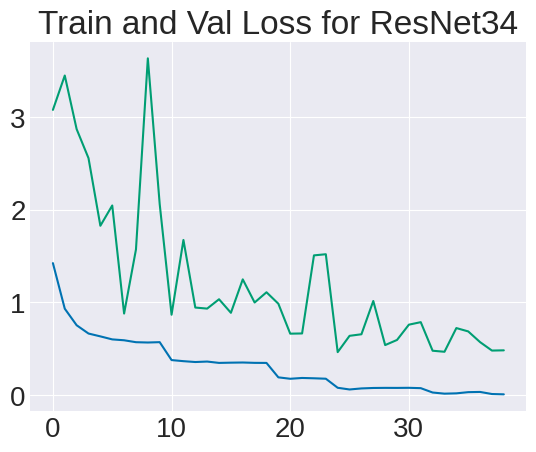

In [7]:
plt.plot(train_loss_hist2, label = 'train loss resnet34')
plt.plot(val_loss_hist2, label = 'val loss resnet34')
plt.title("Train and Val Loss for ResNet34")

Text(0.5, 1.0, 'ResNet34 Val Acc')

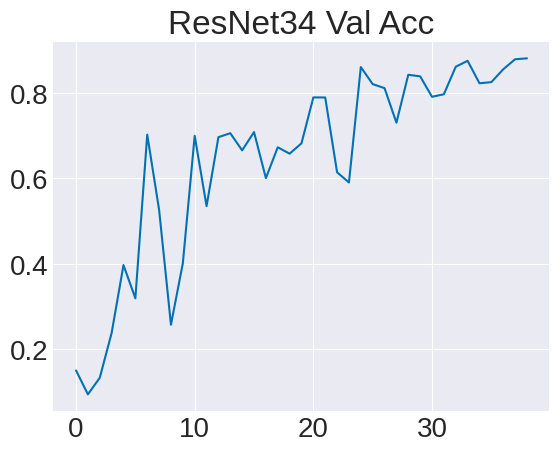

In [8]:
plt.plot(val_acc_hist2, label = 'val_acc history')
plt.title("ResNet34 Val Acc")